In [1]:
#importing data
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("D:\practice\healthcare-dataset-stroke-data.csv",index_col = 0)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [2]:
#to analyse only female data
stroke_female = data[data["gender"]=="Female"]
stroke_female

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0


In [3]:
#filtering the female data for further analysis
stroke_female[["age","heart_disease","ever_married","Residence_type","bmi","smoking_status","stroke"]]

,age,heart_disease,ever_married,Residence_type,bmi,smoking_status,stroke
id,,,,,,,
51676,61.0,0,Yes,Rural,NaN,never smoked,1
60182,49.0,0,Yes,Urban,34.4,smokes,1
1665,79.0,0,Yes,Rural,24.0,never smoked,1
10434,69.0,0,No,Urban,22.8,never smoked,1
27419,59.0,0,Yes,Rural,NaN,Unknown,1
...,...,...,...,...,...,...,...
14180,13.0,0,No,Rural,18.6,Unknown,0
18234,80.0,0,Yes,Urban,NaN,never smoked,0
44873,81.0,0,Yes,Urban,40.0,never smoked,0


In [4]:
#checking the unique values of smoking_status
print(stroke_female["smoking_status"].unique())


['never smoked' 'smokes' 'Unknown' 'formerly smoked']


In [5]:
#analysing the smoking status
female_smoking = stroke_female.groupby("smoking_status")
count = female_smoking.size()
count

smoking_status
Unknown             836
formerly smoked     477
never smoked       1229
smokes              452
dtype: int64

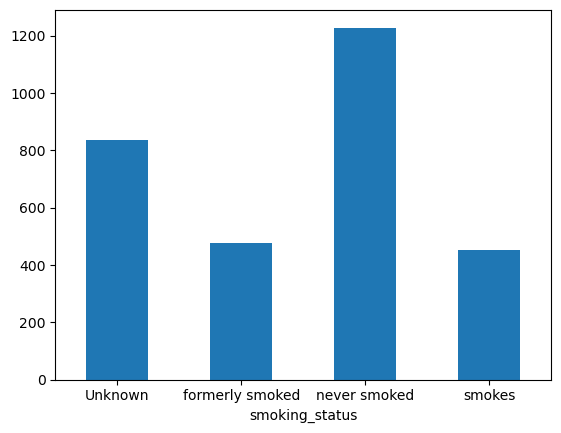

In [6]:
#creating a histogram
count.plot.bar(x = "smoking_status",rot = 0)
plt.show()

In [7]:
#Non_Smoking status in female
Total = count.sum()
Per= round((count["never smoked"]/Total)*100,2)
print("The above analysis concludes that " + str(Per) + "% of the females are non-smokers")



The above analysis concludes that 41.05% of the females are non-smokers


In [8]:
#Prevelance of stroke in smokers and non smokers
#unique values of stroke
print(stroke_female["stroke"].unique())

[1 0]


In [9]:
#stroke count in female
s = stroke_female.groupby("stroke")
count_s = s.size()
count_s

stroke
0    2853
1     141
dtype: int64

In [10]:
#analysing stroke and female data
s_stroke = 0
ns_stroke = 0
for lab,row in stroke_female.iterrows():
    if row["smoking_status"] == "smokes" or "formerly smoked":
        s_stroke += row["stroke"]
    else:
        ns_stroke += row["stroke"]

print("Stroke in smokers: " + str(s_stroke))
print("Stroke in non-smokers: " + str(ns_stroke))

        

Stroke in smokers: 141
Stroke in non-smokers: 0


In [11]:
#Stroke in smokers and non smokers
result = "The above analysis concludes that occurence of stroke is more likely in females who are smokers or have formerly been smokers."
result


'The above analysis concludes that occurence of stroke is more likely in females who are smokers or have formerly been smokers.'

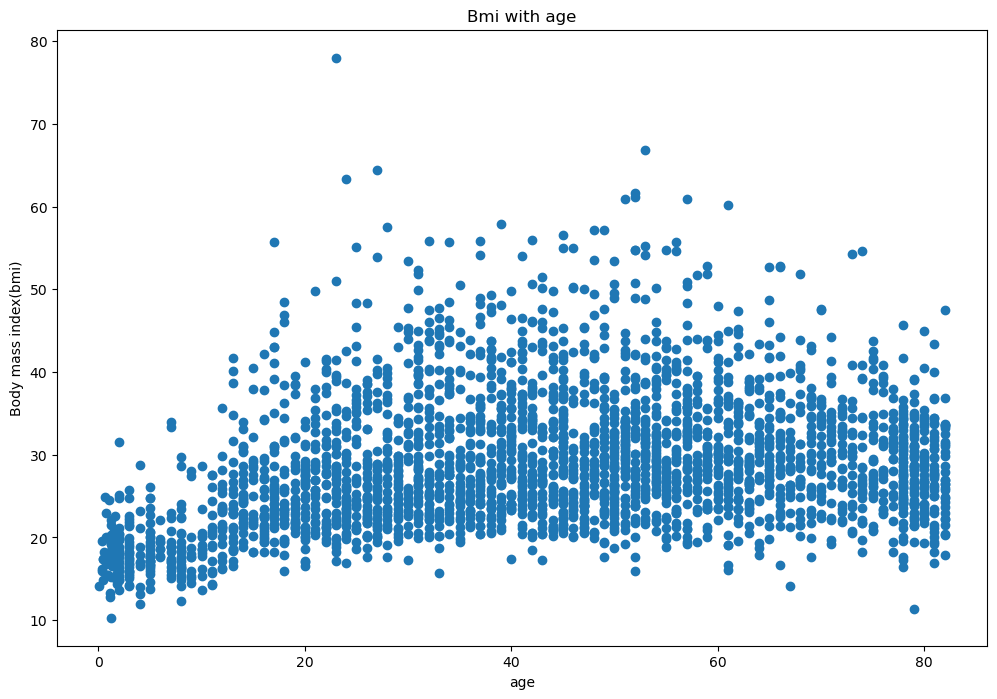

In [12]:
#relation between female age and bmi
fig = plt.figure(figsize = (12,8))
plt.scatter(stroke_female["age"],stroke_female["bmi"])
plt.ylabel('Body mass index(bmi)')
plt.xlabel('age')
plt.title('Bmi with age')
plt.show()

In [13]:
correlation = stroke_female['age'].corr(stroke_female['bmi'])
print("Correlation between age and BMI:", correlation)

Correlation between age and BMI: 0.2776417022232359


In [14]:
#Age and BMI
result = "The above analysis suggests that there is a weaker relation between age and bmi in females"
result

'The above analysis suggests that there is a weaker relation between age and bmi in females'

Text(0.5, 1.0, 'stroke with increasing age')

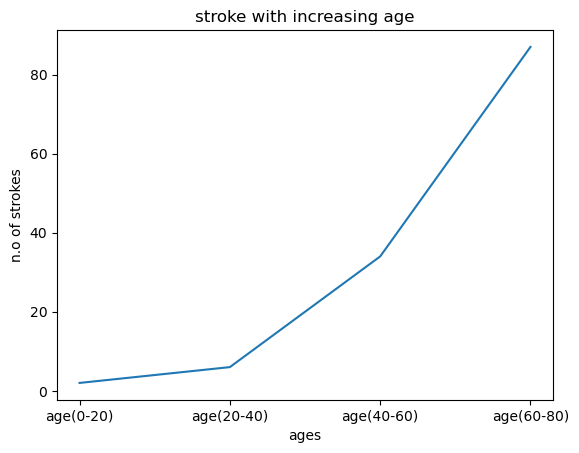

In [24]:
#In what age is a stroke most likely?
count_20 = 0
count_40 = 0
count_60 = 0
count_80 = 0
a = stroke_female.groupby("age")
a.first()
for lab,row in stroke_female.iterrows():
    if row["age"] <= 20:
        count_20 += row["stroke"]
    elif row["age"] > 20 and row["age"] <= 40:
        count_40 += row["stroke"]
    elif row["age"] > 40 and row["age"] <= 60:
        count_60 += row["stroke"]
    elif row["age"] > 60 and row["age"] <= 80:
        count_80 += row["stroke"]
count_total = {
               "age(0-20)": count_20,
               "age(20-40)": count_40,
               "age(40-60)": count_60,
               "age(60-80)": count_80
              }

plt.plot(list(count_total.keys()),list(count_total.values()))
plt.xlabel("ages")
plt.ylabel("n.o of strokes")
plt.title("stroke with increasing age")

    


In [23]:
#conclusion
result = "From the above plot it can be concluded that risk of stroke increases with age."
result

'From the above plot it can be concluded that risk of stroke increases with age.'